# Installing and importing essential packages

In [ ]:
# Don't run this cell if you have already installed
# the packages in requirements.txt
!pip install openpyxl
!pip install missingno
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

In [1]:
# Lets import the packages 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Setting the filepath and reading from file
Let's use OS module for sorting the filenames so that 
the program works on any machine 

In [2]:
# Getting the current working directory
base_path = os.getcwd()
# Joining our filename with the the current working directory
file_path = os.path.join(base_path, 'app_data.xlsx')

# Setting the name of dataset as the name of file (which means Appendicitis Data)
app_data = pd.read_excel(file_path)

In [3]:
# Let's have a look at the dataset
app_data

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.680000,16.900000,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.100000,31.900000,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.140000,23.300000,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.370000,20.600000,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.080000,16.900000,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.413415,25.250476,female,166.5,70.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,17.092402,20.429418,female,158.0,51.0,6.0,secondary surgical,complicated,appendicitis,appendicitis,...,Douglas,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
779,14.992471,19.909972,female,152.0,46.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unauffällig
780,7.195072,14.295549,male,129.3,23.9,5.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,no,NaN,yes,NaN,no,NaN,NaN,NaN,NaN


# First analysis of the data
Let's see some basic statistics of the dataset

In [4]:
app_data.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346483,18.906916,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.387899,425.515789
std,3.529979,4.385252,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433588,271.585211
min,0.000000,7.827983,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725294,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.438741,18.062284,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.099932,21.179011,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.156221,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


In [5]:
# Let's check how many null values are in there in the dataset

# The following command lists the column names in descending order 
# of the data values(i.e. not null values) present in each column
app_data.notnull().sum().sort_values(ascending=False)

Age                                 781
Management                          781
Severity                            781
Sex                                 780
Diagnosis_Presumptive               780
Diagnosis                           780
Weight                              779
US_Performed                        778
Length_of_Stay                      778
Appendix_on_US                      777
WBC_Count                           776
Body_Temperature                    775
Lower_Right_Abd_Pain                774
Nausea                              774
Migratory_Pain                      773
Peritonitis                         773
Loss_of_Appetite                    772
CRP                                 771
Contralateral_Rebound_Tenderness    767
Coughing_Pain                       766
Stool                               765
Hemoglobin                          764
Thrombocyte_Count                   764
RBC_Count                           764
US_Number                           760


## Filtering data
We notice some columns that are sparsely populated.
They might play a crucial role in the decision process (medically speaking).
The [National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8426774/#:~:text=In%20a%20literature%2C%20when%20more,provides%20insignificant%20benefit%20(10).) states that more than 10% missing data skews the result

Hence, we will discard any column which has not null values less than 700, which is ~90% of 780 

In [6]:
# Finding the count of null values in the dataset,
# sorting them in descending order and storing the result 
# in a temporary variable
temp = app_data.notnull().sum().sort_values(ascending=False)

# Selecting the column names which have >500 not null values
# (we use lambda function here)
temp = temp.loc[lambda s: s > 700]

# Let's see how many columns we selected
print("Number of columns selected : ",len(temp))
# Also, let's print out which columns we have selected,
# and the count of not null values in each column
print("\nColumns selected and number of values in them:\n",temp)

Number of columns selected :  34

Columns selected and number of values in them:
 Age                                 781
Management                          781
Severity                            781
Sex                                 780
Diagnosis_Presumptive               780
Diagnosis                           780
Weight                              779
US_Performed                        778
Length_of_Stay                      778
Appendix_on_US                      777
WBC_Count                           776
Body_Temperature                    775
Lower_Right_Abd_Pain                774
Nausea                              774
Migratory_Pain                      773
Peritonitis                         773
Loss_of_Appetite                    772
CRP                                 771
Contralateral_Rebound_Tenderness    767
Coughing_Pain                       766
Stool                               765
Hemoglobin                          764
Thrombocyte_Count                   76

In [88]:
# Now slicing the app_data variable and select the columns that are in temp variable  
# We used temp variable since we only needed it to find out which 
# columns to select. After this operation we don't need temp variable

# We will call this dataframe app_data_filtered, because we will compare it with the 
# app_data using visualisation
app_data_filtered = app_data[list(temp.index)]

# temp.index returns an index object, which is converted to a list using 
# the list() method

# Let's see the resulting dataframe
app_data_filtered

,Age,Management,Severity,Sex,Diagnosis_Presumptive,Diagnosis,Weight,US_Performed,Length_of_Stay,Appendix_on_US,...,US_Number,RDW,Height,BMI,Dysuria,Psoas_Sign,Neutrophilia,Alvarado_Score,Paedriatic_Appendicitis_Score,Free_Fluids
0,12.680000,conservative,uncomplicated,female,appendicitis,appendicitis,37.0,yes,3.0,yes,...,882.0,12.2,148.0,16.900000,no,yes,no,4.0,3.0,no
1,14.100000,conservative,uncomplicated,male,appendicitis,no appendicitis,69.5,yes,2.0,no,...,883.0,12.7,147.0,31.900000,yes,yes,no,5.0,4.0,no
2,14.140000,conservative,uncomplicated,female,appendicitis,no appendicitis,62.0,yes,4.0,no,...,884.0,12.2,163.0,23.300000,no,yes,no,5.0,3.0,no
3,16.370000,conservative,uncomplicated,female,appendicitis,no appendicitis,56.0,yes,3.0,no,...,886.0,13.2,165.0,20.600000,yes,yes,no,7.0,6.0,no
4,11.080000,conservative,uncomplicated,female,appendicitis,appendicitis,45.0,yes,3.0,yes,...,887.0,13.6,163.0,16.900000,no,yes,no,5.0,6.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.413415,primary surgical,uncomplicated,female,appendicitis,appendicitis,70.0,yes,4.0,yes,...,126.0,13.4,166.5,25.250476,no,yes,yes,8.0,7.0,no
778,17.092402,secondary surgical,complicated,female,appendicitis,appendicitis,51.0,yes,6.0,no,...,NaN,12.8,158.0,20.429418,no,no,yes,5.0,3.0,no
779,14.992471,primary surgical,uncomplicated,female,appendicitis,appendicitis,46.0,yes,4.0,no,...,127.0,12.8,152.0,19.909972,yes,no,no,5.0,3.0,yes
780,7.195072,primary surgical,uncomplicated,male,appendicitis,appendicitis,23.9,yes,5.0,yes,...,128.0,12.7,129.3,14.295549,no,no,yes,9.0,8.0,yes


This gives us the columns in which we will impute the values to make the dataset complete

Before moving on, we will check the Age column for any discrepancies,
because we observed (with .describe in the first step) that minimum value in that column is 0.

In [9]:
# Let's inspect the columns with Age < 2
app_data_filtered[app_data_filtered['Age'] < 2]

,Age,Management,Severity,Sex,Diagnosis_Presumptive,Diagnosis,Weight,US_Performed,Length_of_Stay,Appendix_on_US,...,US_Number,RDW,Height,BMI,Dysuria,Psoas_Sign,Neutrophilia,Alvarado_Score,Paedriatic_Appendicitis_Score,Free_Fluids
303,1.727584,conservative,uncomplicated,male,no appendicitis,no appendicitis,12.50,yes,3.0,yes,...,371.0,13.7,83.5,17.928215,no,no,no,5.0,5.0,no
405,0.850000,conservative,uncomplicated,male,appendicitis,no appendicitis,37.80,yes,3.0,yes,...,376.0,13.0,143.0,18.490000,no,no,yes,8.0,7.0,no
638,0.533881,primary surgical,uncomplicated,male,appendicitis,appendicitis,63.10,yes,3.0,yes,...,198.0,11.8,176.0,20.370610,no,no,yes,7.0,4.0,yes
656,0.000000,primary surgical,uncomplicated,male,appendicitis,appendicitis,46.00,yes,6.0,yes,...,205.0,12.9,164.0,17.102915,no,NaN,yes,6.0,4.0,yes
676,0.035592,primary surgical,complicated,male,appendicitis,appendicitis,3.96,yes,12.0,yes,...,260.0,NaN,53.0,14.097544,no,no,no,4.0,4.0,yes


Upon close inspection, we find that rows with index 405 and 638 needs to be fixed since 
these age, weight and height combinations are impossible in real world.
For the sake of simplicity, we assume that the Age column needs fixing

# Data Imputation

We could've dropped the rows with null values by using .dropna() method, but we are choosing to impute missing values. We will use KNN Imputor for numerical values and simple imputor for categorical values.


Firstly, let's see how our dataset looks in terms of missing values when compared with initial dataset.

After that, we will perform imputation

## Visualising missing values

We will use a python package called missingno to plot a matrix of missing value which will help us visualised how our dataset has improved.

<Axes: >

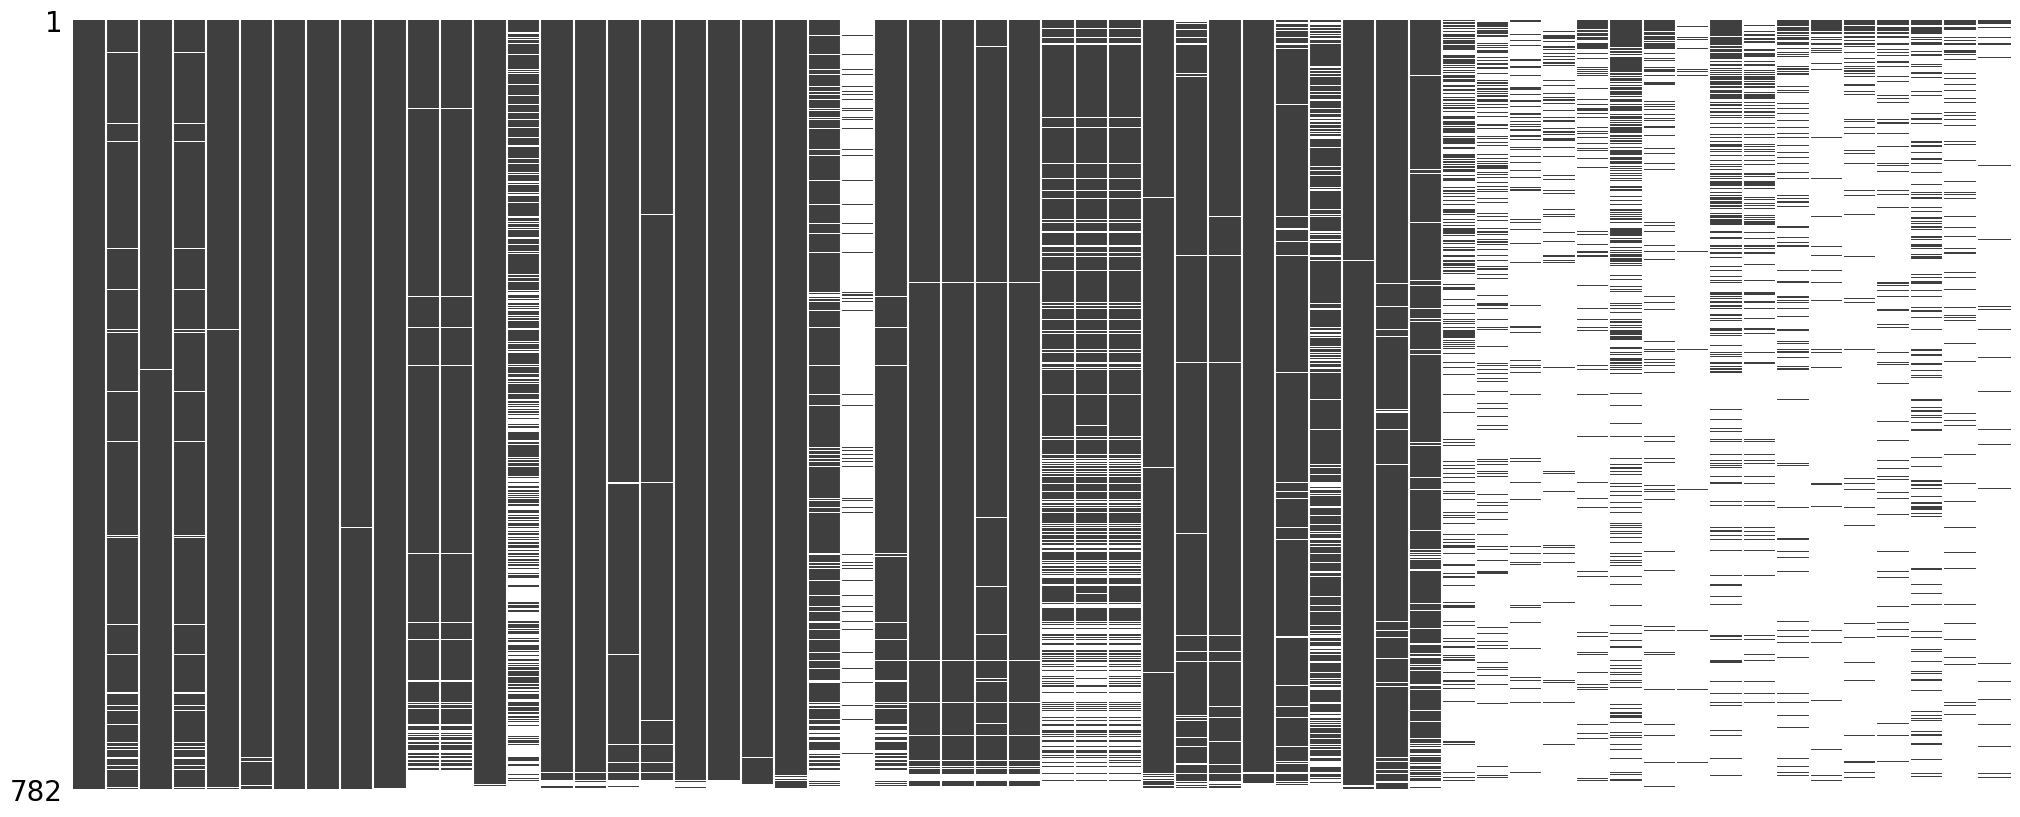

In [10]:
# Let's see how the initial dataset (i.e. app_data dataframe) looked

# Sorting the dataset w.r.t. null values
# sort='descending' parameter tries to sort the rows in decreasing order of missing values in them
sorted_data = msno.nullity_sort(app_data, sort='descending')
# Plotting the matrix of missing values
msno.matrix(sorted_data, sparkline=False)

<Axes: >

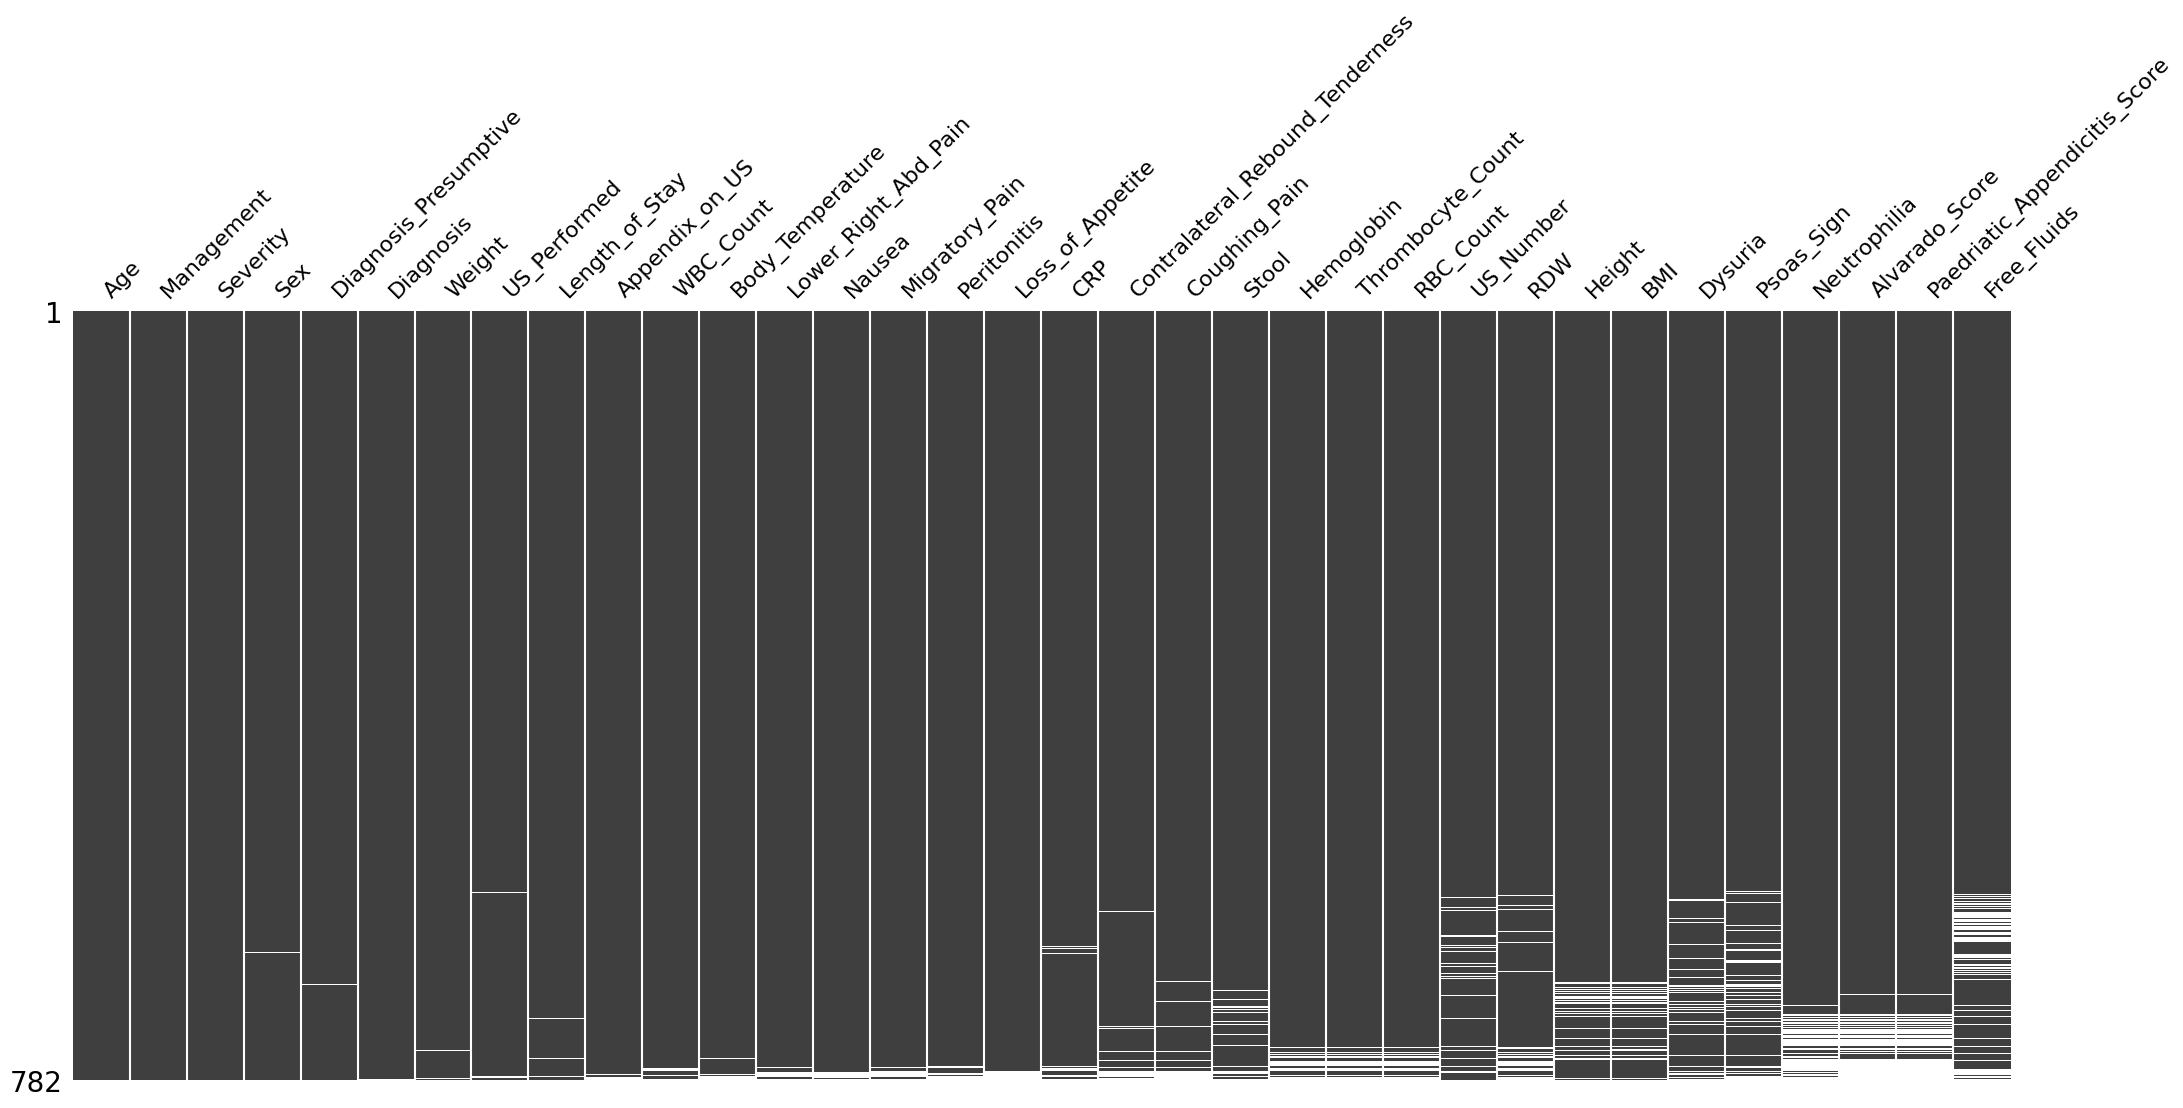

In [11]:
# Now let's see how the dataset looks after filtering (i.e. app_data_filtered dataframe)

# Sorting the dataset w.r.t. null values
sorted_data = msno.nullity_sort(app_data_filtered, sort='descending')
# Plotting the matrix of missing values
msno.matrix(sorted_data, sparkline=False)

## Numerical Imputation

For imputing numerical values, we will use the KNN Imputer from Scikit-Learn, which fills missing values using the mean of k-nearest neighbours found in the dataset.

In [91]:
# First, let's see how many missing values we have 
print(app_data_filtered.isnull().sum())

print('Total missing values : ', app_data_filtered.isnull().sum().sum())

Age                                  1
Management                           1
Severity                             1
Sex                                  2
Diagnosis_Presumptive                2
Diagnosis                            2
Weight                               3
US_Performed                         4
Length_of_Stay                       4
Appendix_on_US                       5
WBC_Count                            6
Body_Temperature                     7
Lower_Right_Abd_Pain                 8
Nausea                               8
Migratory_Pain                       9
Peritonitis                          9
Loss_of_Appetite                    10
CRP                                 11
Contralateral_Rebound_Tenderness    15
Coughing_Pain                       16
Stool                               17
Hemoglobin                          18
Thrombocyte_Count                   18
RBC_Count                           18
US_Number                           22
RDW                      

In [92]:
# Since KNN Imputer doesn't work with strings, we impute the values 
# using only the columns that have float values.

# We use temp_df variable to store only the columns with float values in app_data_filtered dataframe
temp_df = app_data_filtered.loc[:, app_data_filtered.dtypes == 'float64'].copy()

# Since KNN Imputer works with distances, scaling becomes an important part of the process
# Defining the scaler
scaler = MinMaxScaler()
# Scaling the values
temp_df = pd.DataFrame(scaler.fit_transform(temp_df), columns = temp_df.columns)

# Now we will define the KNN Imputer, use fit_transform and save the new (imputed) data
# to a variable

# Defining the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
# Using fit_transform and saving the resulting dataframe into temp_df
temp_df = pd.DataFrame(knn_imputer.fit_transform(temp_df), columns=temp_df.columns)

# Scaling the values back to their original scale
temp_df = pd.DataFrame(scaler.inverse_transform(temp_df), columns = temp_df.columns)

In [95]:
# Now let's merge these values with our original dataframe 
app_data_filtered.loc[:, temp_df.columns] = temp_df

# Let's have a look at the missing value statistics again 
print(app_data_filtered.isnull().sum())

print('Total missing values : ', app_data_filtered.isnull().sum().sum())

Age                                  0
Management                           1
Severity                             1
Sex                                  2
Diagnosis_Presumptive                2
Diagnosis                            2
Weight                               0
US_Performed                         4
Length_of_Stay                       0
Appendix_on_US                       5
WBC_Count                            0
Body_Temperature                     0
Lower_Right_Abd_Pain                 8
Nausea                               8
Migratory_Pain                       9
Peritonitis                          9
Loss_of_Appetite                    10
CRP                                  0
Contralateral_Rebound_Tenderness    15
Coughing_Pain                       16
Stool                               17
Hemoglobin                           0
Thrombocyte_Count                    0
RBC_Count                            0
US_Number                            0
RDW                      